## Importing Relavant Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

In [3]:
# Changing default figure size of Matplotlib graph
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (14, 7)

## Reading Dataset

In [4]:
df=pd.read_csv("Data_Updated.csv")
df.head()

,_id,Year,Month,Station_Name,Leaving_Status,Num_of_Traffic
0,1905.0,2016.0,1.0,Ofakim,Late,6.0
1,1906.0,2016.0,1.0,Ofakim,In-Time,38.0
2,1907.0,2016.0,1.0,Ashdod_Ad_Halom,Late,58.0
3,1908.0,2016.0,1.0,Ashdod_Ad_Halom,In-Time,1744.0
4,1909.0,2016.0,1.0,Ashdod_Ad_Halom,Precede,135.0


In [5]:
# Dropping the id column
df.drop("_id", axis=1, inplace=True)

In [6]:
df.shape

(10928, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10928 entries, 0 to 10927
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            10920 non-null  float64
 1   Month           10920 non-null  float64
 2   Station_Name    10920 non-null  object 
 3   Leaving_Status  10920 non-null  object 
 4   Num_of_Traffic  10920 non-null  float64
dtypes: float64(3), object(2)
memory usage: 427.0+ KB


## Data Cleaning

#### Null Values

In [8]:
# Check for missing values in the column vise
def missing_zero_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print("The " +  " dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " rows.\n"
          "There are " + str(mz_table.shape[0]) + " columns that have missing values.")
    return mz_table

missing_zero_values_table(df)

The  dataframe has 5 columns and 10928 rows.
There are 5 columns that have missing values.


,Missing Values,% of Total Values,Data Type
Year,8,0.1,float64
Month,8,0.1,float64
Station_Name,8,0.1,object
Leaving_Status,8,0.1,object
Num_of_Traffic,8,0.1,float64


In [9]:
df[df.Year.isnull()]

,Year,Month,Station_Name,Leaving_Status,Num_of_Traffic
10920,NaN,NaN,NaN,NaN,NaN
10921,NaN,NaN,NaN,NaN,NaN
10922,NaN,NaN,NaN,NaN,NaN
10923,NaN,NaN,NaN,NaN,NaN
10924,NaN,NaN,NaN,NaN,NaN
10925,NaN,NaN,NaN,NaN,NaN
10926,NaN,NaN,NaN,NaN,NaN
10927,NaN,NaN,NaN,NaN,NaN


We can see that there are 8 records that are completely **NULL**. So we have to remove these 8 records.

In [10]:
# Dropping Null records
df.dropna(inplace=True)

#### Duplicate Rows

In [11]:
df[df.duplicated()]

,Year,Month,Station_Name,Leaving_Status,Num_of_Traffic


Luckily there is no Duplicate value in the dataset.

In [12]:
# Dataset cells
print("Total Number of Cells in dataset are ", df.shape[0]*df.shape[1])

Total Number of Cells in dataset are  54600


After the data cleaning we have more than **50,000** cells of data.

## Exploratory Data Analysis

In [13]:
# Function to show percentage on bars
def per_on_bar(plot,feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

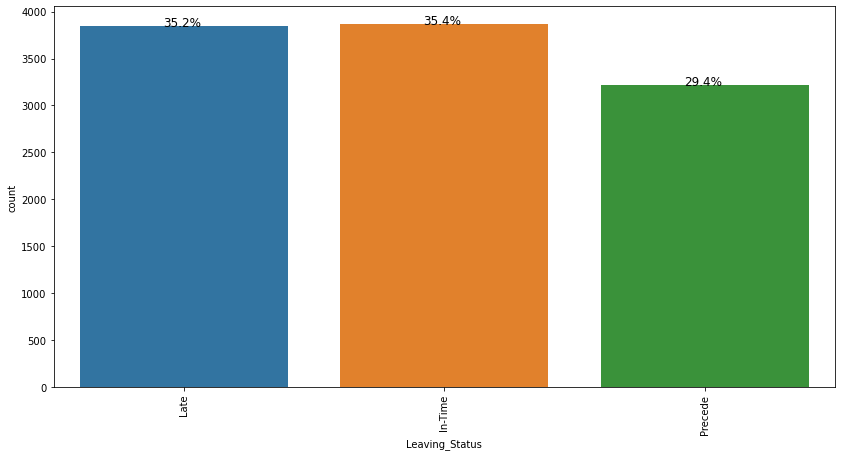

In [14]:
plt.xticks(rotation=90)
ax = sns.countplot(df.Leaving_Status)
per_on_bar(ax, df.Station_Name)

The number of late and in time leave of trainings is the same, but there were less number of trains that leave before their time.

In [15]:
print("Total stations are: ", len(df.Station_Name.unique()))

Total stations are:  69


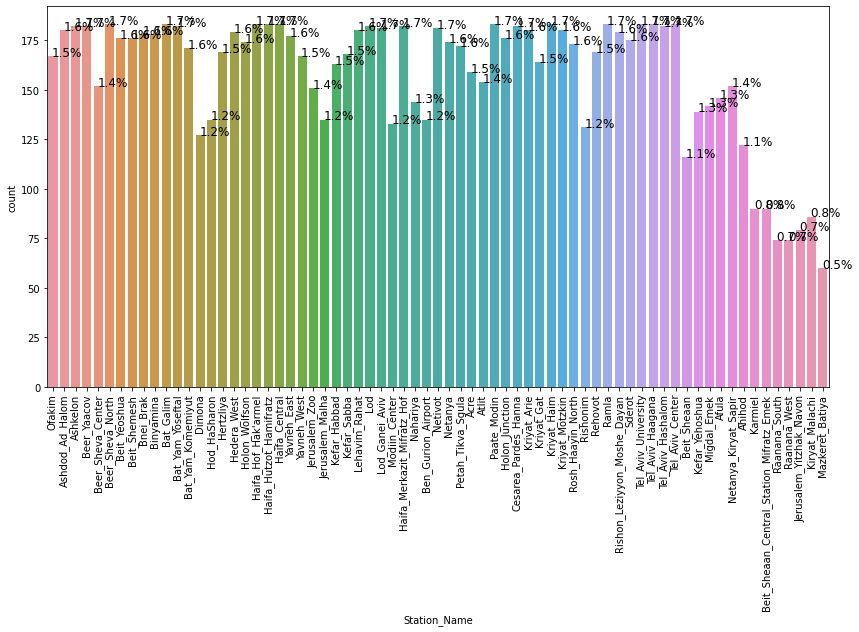

In [16]:
plt.xticks(rotation=90)
ax = sns.countplot(df.Station_Name)
per_on_bar(ax, df.Station_Name)

In [17]:
# Code to plot stackplot
def stackplot(data):
    tab1 =  pd.crosstab(data, df.Leaving_Status, margins=True)
    print(tab1)
    print("="*126)
    
    l = len(data)
    
    tab2 = pd.crosstab(data, df.Leaving_Status, normalize="index")
    tab2.plot(kind="bar", stacked=True)
    plt.show()

Leaving_Status  In-Time  Late  Precede    All
Year                                         
2016.0              686   686      617   1989
2017.0              739   740      597   2076
2018.0              780   780      667   2227
2019.0              823   823      690   2336
2020.0              653   637      519   1809
2021.0              182   178      123    483
All                3863  3844     3213  10920


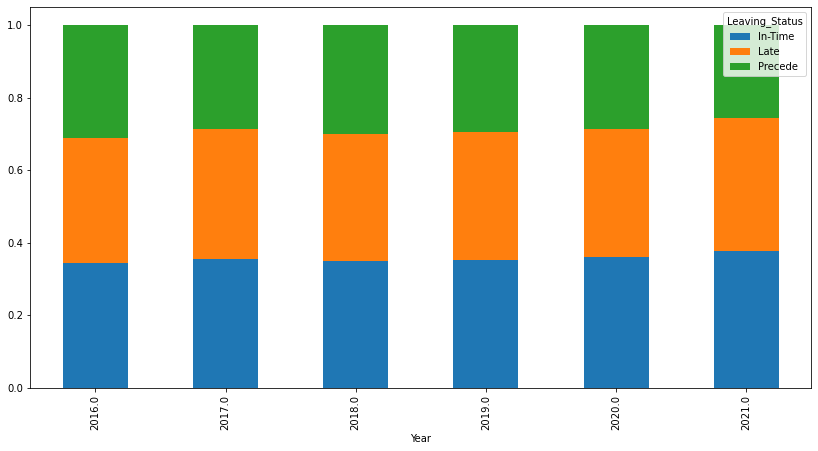

In [18]:
stackplot(df.Year)

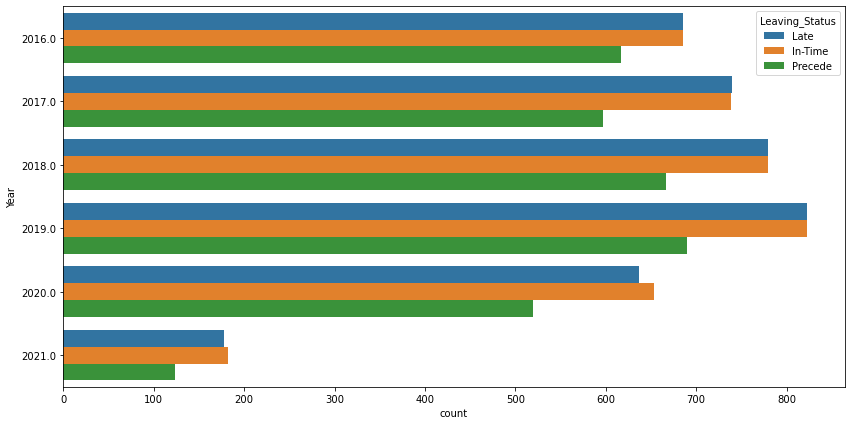

In [19]:
sns.countplot(y=df.Year,hue=df.Leaving_Status, orient="v")
plt.show()

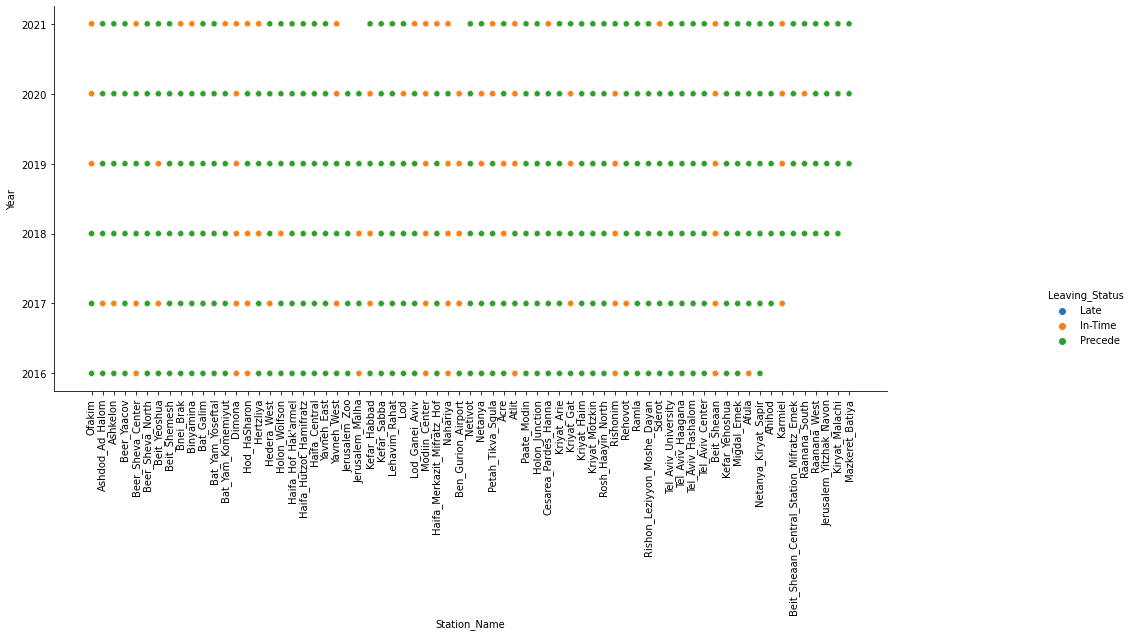

In [20]:
ax = sns.relplot(x=df.Station_Name, y=df.Year, hue=df.Leaving_Status)
ax.fig.set_size_inches(17, 6)
plt.xticks(rotation=90)
plt.show()

By observing the last 3 graphs we can see that **2019** was the worst year for trains leaving status. The number of Late and In-time leaving trains are higher in 2019. After that it starts to become lower. It seems like the records of trains after 2019 were not collected very much or some other problem the numbers of trains have been reduced (maybe because of COVID-19). But the worst time was 2019 and it started from 2017.

## Feature Engineering

#### Label Encoding

Machine Learning models can not perform prediction on textual data, So we have to convert textual data to integer format.

In our dataset there are some columns that have textual data. So we will convert them into integer using Label Encoding Technique.

In [21]:
# Converting textual data to inetgers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

categorical_col = ["Station_Name", "Leaving_Status"]

for i in categorical_col:
    df[i] = encoder.fit_transform(df[i])
    
df.head()

,Year,Month,Station_Name,Leaving_Status,Num_of_Traffic
0,2016.0,1.0,52,1,6.0
1,2016.0,1.0,52,0,38.0
2,2016.0,1.0,3,1,58.0
3,2016.0,1.0,3,0,1744.0
4,2016.0,1.0,3,2,135.0


We have used Label Encoder from Scikit learn library to convert categorical data to integer.

Now for Leaving_Status it encoded as...
- 0 --> In-Time
- 1 --> Late
- 2 --> Precede

#### Feature Selection 

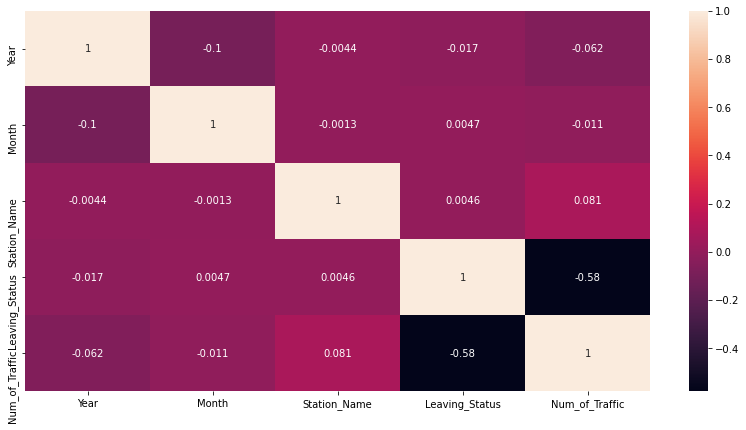

In [22]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## Machine Learning Model Preparation

In [23]:
# Arrays to store model detail
model = []
acc = []

In [24]:
# Spliting data into dependent and independent
x = df.drop("Leaving_Status", axis=1)
y = df.Leaving_Status

In [25]:
# Spliting data into train test part
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

#### 1) Logistic Regression

In [26]:
# Training Logistic model on train data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [27]:
score = round(lr.score(x_test, y_test)*100, 2)
model.append("Logistic Regression")
acc.append(score)
print("Logistic Regression model accuracy is: ", score, "%")

Logistic Regression model accuracy is:  65.71 %


#### 2) Random Forest  Model

In [28]:
# Fitting Random Forest Classification to the training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
score = round(rf.score(x_test, y_test)*100, 2)
model.append("Random Forest")
acc.append(score)
print("Random Forest model accuracy is: ", score, "%")

Random Forest model accuracy is:  89.01 %


So, from the two models we can see that **Random Forest** is better.

Now we will check some more models to see who is the best:

#### 3) KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
score = round(knn.score(x_test, y_test)*100, 2)
model.append("KNeighbors Classifier")
acc.append(score)
print("KNeighbors Classifier model accuracy is: ", score, "%")

KNeighbors Classifier model accuracy is:  78.35 %


#### 4) Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
score = round(dtc.score(x_test, y_test)*100, 2)
model.append("Decision Tree Classifier")
acc.append(score)
print("Decision Tree classifier model accuracy is: ", score, "%")

Decision Tree classifier model accuracy is:  86.37 %


## Models Comparison

In [34]:
comp = pd.DataFrame({"Model": model, "Accuracy[%]": acc})
comp

,Model,Accuracy[%]
0,Logistic Regression,65.71
1,Random Forest,89.01
2,KNeighbors Classifier,78.35
3,Decision Tree Classifier,86.37


From this comparison we can see that Random Forest is better than any other model. So, we will finalize this model for our further procedure.

## Finalized Model Report

In [35]:
from sklearn.metrics import plot_confusion_matrix, classification_report
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       959
           1       0.85      0.89      0.87       979
           2       0.85      0.79      0.82       792

    accuracy                           0.89      2730
   macro avg       0.89      0.88      0.89      2730
weighted avg       0.89      0.89      0.89      2730



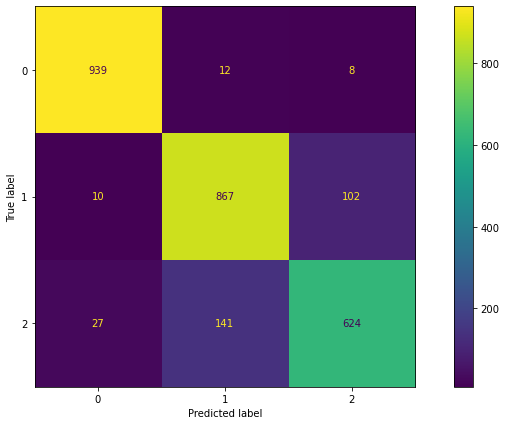

In [36]:
plot_confusion_matrix(rf, x_test, y_test)
plt.show()

## Prediction

Let's make some predictions for future trains if they will be **LATE, IN_TIME or PRECEDE**

In [37]:
# Function to make prediction
def predict(data):
    data = np.reshape(data, (1, -1))
    res = rf.predict(data)
    
    if res[0]==0:
        return "In_Time"
    elif res[0]==1:
        return "Late"
    else:
        return "Precede"

In [38]:
# Making prediction for new data 
data = x_test.iloc[0].values
res = predict(data)
print(f"Train that having data {data} will be {res}")

Train that having data [2016.    5.   29.   63.] will be Late


# Conclusion & Answer to Queries

**Is the data have more than 50,000 cells after data cleaning?**

    Yes, the data has almost 54,000 cells even after complete process of data cleaning.

**What is the behavior of the train's leaving status with importance to Years? Explain it through graph.**
    
    Graphs are presented in EDA Part. By observing the 3 last graphs we can see that 2019 was the worst year for trains leaving status. The number of late and in-time leaving trains are high in 2019. after that it starts to become lower. It seems like the records of trains after 2019 were not collected very much or some other problem the numbers of trains have been reduced (maybe because of COVID-19). But the worst time was 2019 and it started from 2017.

**Machine Learning model to predict future leaving status of trains.**

    Yes, we have applied machine learning models to predict the future values. we prepared 4 models.
        - Logistic Regression
        - Random Forest Classifier
        - KNN
        - Decision Tree
    Random Forest is giving best accuracy that is almost almost 88%. After we predicted that a specific train will leave the station "Late, In-time, Precede" and the model predicted if the train will leave late. So depending on this prediction we can answer the question will the train i'm heading for, will leave the train station at time?
 